# Store Sales - Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

In [2]:
type_dict = {
    "id" : int,
    "date" : "string",
    "store_nbr" : int,
    "family" : "string",
    "sales" : float,
    "onpromotion": int
}

test_df = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv", index_col = "id", dtype = type_dict)
train_df = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv", index_col = "id", dtype = type_dict)
train_df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [3]:
train_df = train_df[train_df.apply(lambda x: x["sales"]>0, axis=1)]
train_df.reset_index(inplace=True, drop=True)
train_df

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,25,BEAUTY,2.000,0
1,2013-01-01,25,BEVERAGES,810.000,0
2,2013-01-01,25,BREAD/BAKERY,180.589,0
3,2013-01-01,25,CLEANING,186.000,0
4,2013-01-01,25,DAIRY,143.000,0
...,...,...,...,...,...
2061753,2017-08-15,9,POULTRY,438.133,0
2061754,2017-08-15,9,PREPARED FOODS,154.553,1
2061755,2017-08-15,9,PRODUCE,2419.729,148
2061756,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test_df["date"] = pd.to_datetime(test_df["date"])
train_df["date"] = pd.to_datetime(train_df["date"])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061758 entries, 0 to 2061757
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       string        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(1)
memory usage: 78.6 MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
train_df["year"] = train_df.apply(lambda x: x["date"].year, axis=1)
train_df["month"] = train_df.apply(lambda x: x["date"].month, axis=1)
train_df["day of month"] = train_df.apply(lambda x: x["date"].day, axis=1)
train_df["day of week"] = train_df.apply(lambda x: x["date"].weekday(), axis=1)
test_df["year"] = test_df.apply(lambda x: x["date"].year, axis=1)
test_df["month"] = test_df.apply(lambda x: x["date"].month, axis=1)
test_df["day of month"] = test_df.apply(lambda x: x["date"].day, axis=1)
test_df["day of week"] = test_df.apply(lambda x: x["date"].weekday(), axis=1)
test_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,store_nbr,family,onpromotion,year,month,day of month,day of week
id,,,,,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2
3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2
3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2
3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2
3000892,2017-08-16,1,BOOKS,0,2017,8,16,2
...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,1,2017,8,31,3
3029396,2017-08-31,9,PREPARED FOODS,0,2017,8,31,3
3029397,2017-08-31,9,PRODUCE,1,2017,8,31,3


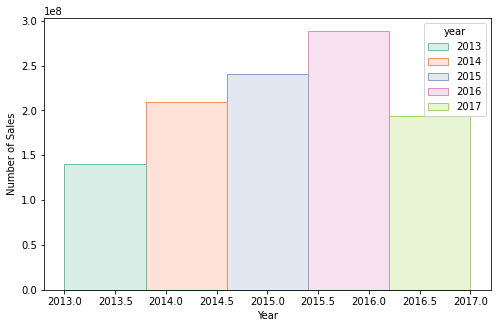

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="year", weights="sales", bins=5, ax=ax, element="step", hue="year", palette="Set2")
ax.set(xlabel="Year", ylabel="Number of Sales")
plt.show()

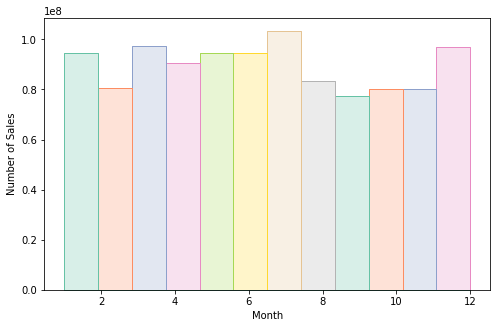

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="month", weights="sales", bins=12, ax=ax, element="step", hue="month", palette="Set2", legend=False)
ax.set(xlabel="Month", ylabel="Number of Sales")
plt.show()

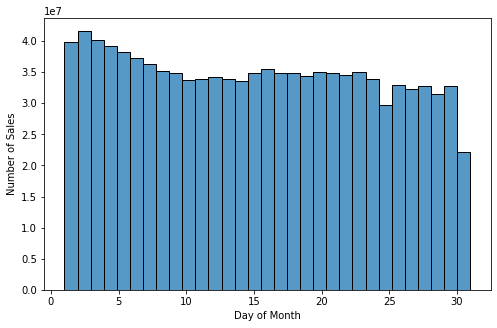

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="day of month", weights="sales", bins=31, ax=ax,)
ax.set(xlabel="Day of Month", ylabel="Number of Sales")
plt.show()

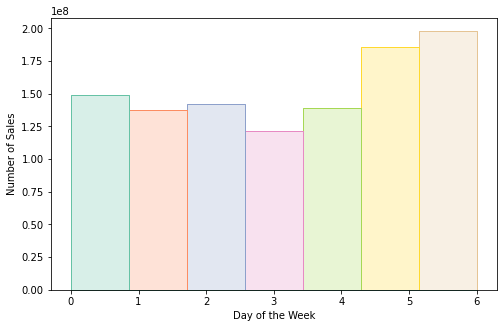

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="day of week", weights="sales", bins=7, ax=ax, element="step", hue="day of week", palette="Set2", legend=False)
ax.set(xlabel="Day of the Week", ylabel="Number of Sales")
plt.show()

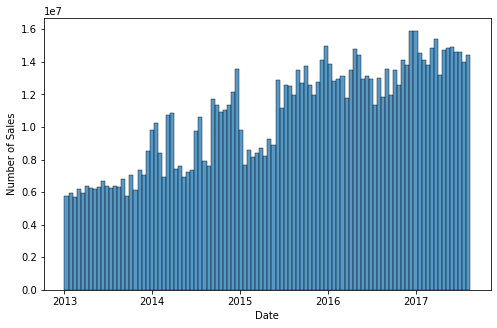

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="date", weights="sales", bins=100, ax=ax)
ax.set(xlabel="Date", ylabel="Number of Sales")
plt.show()

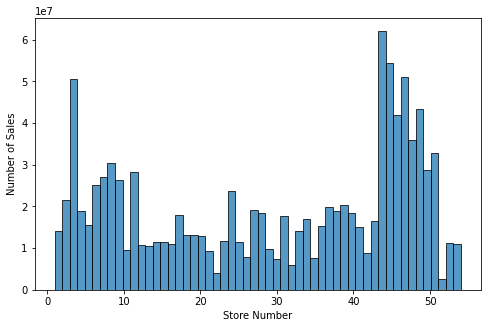

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="store_nbr", weights="sales", ax=ax, bins=54)
ax.set(xlabel="Store Number", ylabel="Number of Sales")
plt.show()

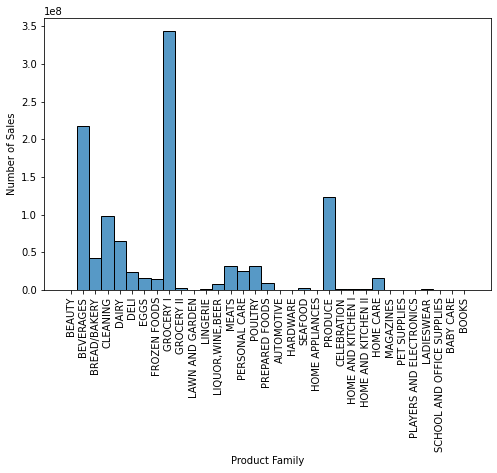

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=train_df, x="family", weights="sales", bins=100, ax=ax)
ax.set(xlabel="Product Family", ylabel="Number of Sales")
plt.xticks(rotation=90)
plt.show()

In [13]:
test_df["onpromotion"] = test_df["onpromotion"]/train_df["onpromotion"].max()
test_df["year"] = test_df["year"]/3000
train_df["onpromotion"] = train_df["onpromotion"]/train_df["onpromotion"].max()
train_df["year"] = train_df["year"]/3000
train_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,store_nbr,family,sales,onpromotion,year,month,day of month,day of week
0,2013-01-01,25,BEAUTY,2.000,0.000000,0.671000,1,1,1
1,2013-01-01,25,BEVERAGES,810.000,0.000000,0.671000,1,1,1
2,2013-01-01,25,BREAD/BAKERY,180.589,0.000000,0.671000,1,1,1
3,2013-01-01,25,CLEANING,186.000,0.000000,0.671000,1,1,1
4,2013-01-01,25,DAIRY,143.000,0.000000,0.671000,1,1,1
...,...,...,...,...,...,...,...,...,...
2061753,2017-08-15,9,POULTRY,438.133,0.000000,0.672333,8,15,1
2061754,2017-08-15,9,PREPARED FOODS,154.553,0.001350,0.672333,8,15,1
2061755,2017-08-15,9,PRODUCE,2419.729,0.199730,0.672333,8,15,1
2061756,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,0.010796,0.672333,8,15,1


In [14]:
train_df.drop("date", axis=1, inplace=True)
test_df.drop("date", axis=1, inplace=True)
train_df

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,store_nbr,family,sales,onpromotion,year,month,day of month,day of week
0,25,BEAUTY,2.000,0.000000,0.671000,1,1,1
1,25,BEVERAGES,810.000,0.000000,0.671000,1,1,1
2,25,BREAD/BAKERY,180.589,0.000000,0.671000,1,1,1
3,25,CLEANING,186.000,0.000000,0.671000,1,1,1
4,25,DAIRY,143.000,0.000000,0.671000,1,1,1
...,...,...,...,...,...,...,...,...
2061753,9,POULTRY,438.133,0.000000,0.672333,8,15,1
2061754,9,PREPARED FOODS,154.553,0.001350,0.672333,8,15,1
2061755,9,PRODUCE,2419.729,0.199730,0.672333,8,15,1
2061756,9,SCHOOL AND OFFICE SUPPLIES,121.000,0.010796,0.672333,8,15,1


In [15]:
categorical_cols = ["store_nbr", "family", "month", "day of month", "day of week"]
one_hot_dataframes = []
for col in categorical_cols:
    temp = pd.get_dummies(train_df[col])
    for name in temp.columns:
        temp.rename({name: col + "_" + str(name)}, axis=1, inplace=True)
    one_hot_dataframes.append(temp)
one_hot_dataframes.append(train_df)
concat_train_df = pd.concat(one_hot_dataframes, axis=1)
concat_train_df.drop(["store_nbr", "family", "month", "day of month", "day of week"], axis=1, inplace=True)
concat_train_df

,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,store_nbr_19,store_nbr_20,store_nbr_21,store_nbr_22,store_nbr_23,store_nbr_24,store_nbr_25,store_nbr_26,store_nbr_27,store_nbr_28,store_nbr_29,store_nbr_30,store_nbr_31,store_nbr_32,store_nbr_33,store_nbr_34,store_nbr_35,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day of month_1,day of month_2,day of month_3,day of month_4,day of month_5,day of month_6,day of month_7,day of month_8,day of month_9,day of month_10,day of month_11,day of month_12,day of month_13,day of month_14,day of month_15,day of month_16,day of month_17,day of month_18,day of month_19,day of month_20,day of month_21,day of month_22,day of month_23,day of month_24,day of month_25,day of month_26,day of month_27,day of month_28,day of month_29,day of month_30,day of month_31,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,sales,onpromotion,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.000,0.000000,0.671000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,810.000,0.000000,0.671000
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,180.589,0.000000,0.671000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,186.000,0.000000,0.671000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,143.000,0.000000,0.671000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [16]:
one_hot_dataframes = []
for col in categorical_cols:
    temp = pd.get_dummies(test_df[col])
    for name in temp.columns:
        temp.rename({name: col + "_" + str(name)}, axis=1, inplace=True)
    one_hot_dataframes.append(temp)
one_hot_dataframes.append(test_df)
concat_test_df = pd.concat(one_hot_dataframes, axis=1)
concat_test_df.drop(["store_nbr", "family", "month", "day of month", "day of week"], axis=1, inplace=True)
concat_test_df

,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,store_nbr_19,store_nbr_20,store_nbr_21,store_nbr_22,store_nbr_23,store_nbr_24,store_nbr_25,store_nbr_26,store_nbr_27,store_nbr_28,store_nbr_29,store_nbr_30,store_nbr_31,store_nbr_32,store_nbr_33,store_nbr_34,store_nbr_35,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month_8,day of month_16,day of month_17,day of month_18,day of month_19,day of month_20,day of month_21,day of month_22,day of month_23,day of month_24,day of month_25,day of month_26,day of month_27,day of month_28,day of month_29,day of month_30,day of month_31,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,onpromotion,year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000888,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.672333
3000889,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.672333
3000890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.002699,0.672333
3000891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.026991,0.672333
3000892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.672333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.001350,0.672333
3029396,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.000000,0.67233

In [17]:
missing_cols = [
    "month_1", 
    "month_2", 
    "month_3", 
    "month_4", 
    "month_5", 
    "month_6", 
    "month_7", 
    "month_9", 
    "month_10", 
    "month_11", 
    "month_12",
    "day of month_1",
    "day of month_2",
    "day of month_3",
    "day of month_4",
    "day of month_5",
    "day of month_6",
    "day of month_7",
    "day of month_8",
    "day of month_9",
    "day of month_10",
    "day of month_11",
    "day of month_12",
    "day of month_13",
    "day of month_14",
    "day of month_15",
]

for col in missing_cols:
    concat_test_df[col] = pd.Series(0, index=concat_test_df.index)

concat_test_df

,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,store_nbr_19,store_nbr_20,store_nbr_21,store_nbr_22,store_nbr_23,store_nbr_24,store_nbr_25,store_nbr_26,store_nbr_27,store_nbr_28,store_nbr_29,store_nbr_30,store_nbr_31,store_nbr_32,store_nbr_33,store_nbr_34,store_nbr_35,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month_8,day of month_16,day of month_17,day of month_18,day of month_19,day of month_20,day of month_21,day of month_22,day of month_23,day of month_24,day of month_25,day of month_26,day of month_27,day of month_28,day of month_29,day of month_30,day of month_31,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,onpromotion,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_9,month_10,month_11,month_12,day of month_1,day of month_2,day of month_3,day of month_4,day of month_5,day of month_6,day of month_7,day of month_8,day of month_9,day of month_10,day of month_11,day of month_12,day of month_13,day of month_14,day of month_15
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000888,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.672333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3000889,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.672333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3000890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.002699,0.672333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3000891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.026991,0.672333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3000892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.672333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [18]:
train_features = concat_train_df.drop("sales", axis=1)
train_labels = concat_train_df["sales"]

In [19]:
X_train_prelim, X_test_prelim, y_train_prelim, y_test_prelim = train_test_split(train_features, train_labels, test_size=0.2, shuffle=True)
model = LinearRegression()
model.fit(X_train_prelim, y_train_prelim)
accuracy = round(model.score(X_test_prelim, y_test_prelim)*100, 2)
print(f"Accuracy: {accuracy}%")

Accuracy: 63.71%


In [20]:
X_train, y_train = train_features, train_labels
X_test = concat_test_df[train_features.columns]
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction

array([-157.5, -150.5, -184. , ..., 1742.5,   67.5,  119. ])

In [21]:
test_df.reset_index(inplace=True)
test_df["sales"] = prediction
submission = test_df[["id", "sales"]]
submission

,id,sales
0,3000888,-157.5
1,3000889,-150.5
2,3000890,-184.0
3,3000891,2570.0
4,3000892,-474.5
...,...,...
28507,3029395,488.5
28508,3029396,231.5
28509,3029397,1742.5
28510,3029398,67.5


In [22]:
submission.to_csv("submission.csv", index=False)